In [1]:
import sys
import os

# Obtener la ruta al directorio padre
root = os.path.abspath(r'..\..')

# Agregar la ruta al sys.path para que Python busque en el directorio padre
sys.path.append(root)

import h5py as h5
import numpy as np
from modules.loaders import LoadDataset


In [3]:
###* Load the dataset
dataset = LoadDataset(h5_file= 'positions_FACES_GERARDO.h5').load_h5()
type(dataset)

h5py._hl.files.File

In [4]:
with dataset as h5file:
    data_h5 = []
    labels = []
    for face in h5file.keys():
        positions = h5file[face]['positions'][:]
        data_h5.append(positions)
        # print(positions.shape)
        labels.extend([face]*positions.shape[1]) #* extend is used to add the elements of the list, not the list itself  

labels = np.array(labels)
labels_letter = np.reshape(labels, (labels.shape[0], ))
labels_letter.shape


(12000,)

In [5]:
for i, id in enumerate(data_h5):
    print('Data shape',i, id.shape)

Data shape 0 (1872, 3000)
Data shape 1 (1872, 3000)
Data shape 2 (1872, 3000)
Data shape 3 (1872, 3000)


In [14]:
type(data_h5[0])

numpy.ndarray

In [19]:
feliz = data_h5[0].T
neutral = data_h5[1].T
sorpresa = data_h5[2].T
triste = data_h5[3].T
feliz.shape, neutral.shape, sorpresa.shape, triste.shape



((3000, 1872), (3000, 1872), (3000, 1872), (3000, 1872))

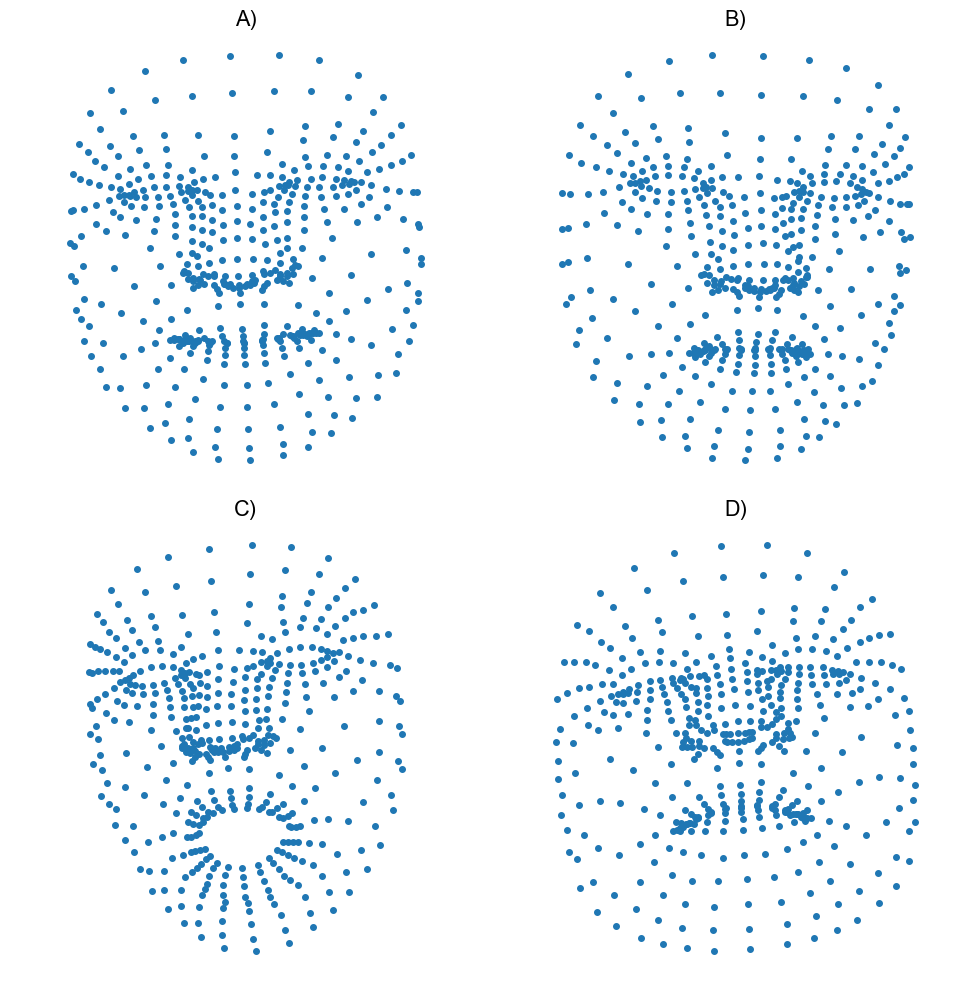

In [49]:
import matplotlib.pyplot as plt
from matplotlib import rcParams

# Configurar la fuente global a Times New Roman y ajustar el tamaño
rcParams['font.family'] = 'Arial'
rcParams['font.size'] = 13  # Cambia el tamaño de la fuente según sea necesario

# Asegúrate de que las emociones (feliz, triste, etc.) estén definidas
# Ejemplo: feliz, neutral, sorpresa, triste son matrices con datos de puntos faciales
emociones = {
    "A)": feliz,
    "B)": neutral,
    "C)": sorpresa,
    "D)": triste,
}

face_selected = 2500  # Índice de la cara seleccionada

# Crear una figura con una cuadrícula de 2x2
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

# Iterar sobre las emociones y sus posiciones en la cuadrícula
for ax, (emocion, datos) in zip(axes.flatten(), emociones.items()):
    ax.plot(datos[face_selected, 0:467], datos[face_selected, 468:935], 'o',markersize=4)  # Puntos faciales
    ax.invert_yaxis()
    ax.set_title(emocion)  # Título con el nombre de la emoción
    ax.axis('equal')  # Escala igual para ambos ejes
    ax.axis('off')  # Ocultar los ejes

# Ajustar el espacio entre subgráficos
plt.savefig(r'C:\Users\hgera\OneDrive\Escritorio\TESINA\imagenes\emociones.pdf')
plt.tight_layout()
plt.show()